<a href="https://colab.research.google.com/github/whyrzky/DS-Portfolio-Projects/blob/main/Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

## 1 Import Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
plt.style.use('seaborn')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path ="/content/gdrive/MyDrive/Belajar Python/Final Project/" 

df = pd.read_csv(path+'data.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df.head(5)

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
0,0,1845.2,6068.2,504.27,1.24,15.56,4.36,14.567329,376.63,1.2366,10.66,0.0055,6.46,1
1,1,2055.0,6259.1,612.20,1.24,16.63,5.83,16.707625,375.39,1.2129,12.15,0.0056,6.16,1
2,4,1750.0,5767.5,624.33,1.22,14.77,7.92,16.067787,388.69,1.0374,12.58,0.0066,6.77,0
3,5,1812.0,6392.7,614.41,1.19,14.29,7.91,16.274743,396.82,1.0315,12.23,0.0060,7.04,0
4,6,2124.0,6615.6,556.34,1.18,16.66,9.74,16.913348,397.52,1.0400,12.08,0.0060,6.76,0


## 2 Exploratory Data Analysis (EDA) & Data Pre-Processing

In [ ]:
df.shape

(270, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Id                                      270 non-null    int64  
 1   Ekspor                                  270 non-null    float64
 2   Cadangan Devisa                         270 non-null    float64
 3   IHSG                                    270 non-null    float64
 4   Selisih Pinjaman dan Simpanan           270 non-null    float64
 5   Suku Bunga Simpanan Riil                270 non-null    float64
 6   Selisih BI Rate Riil dan FED Rate Riil  270 non-null    float64
 7   Simpanan bank                           270 non-null    float64
 8   Nilai Tukar Riil                        270 non-null    float64
 9   Nilai Tukar Perdagangan                 270 non-null    float64
 10  M1                                      270 non-null    float6

In [ ]:
df.duplicated().any()

False

### Summary Data

In [ ]:
df.isna().sum()

Id                                        0
Ekspor                                    0
Cadangan Devisa                           0
IHSG                                      0
Selisih Pinjaman dan Simpanan             0
Suku Bunga Simpanan Riil                  0
Selisih BI Rate Riil dan FED Rate Riil    0
Simpanan bank                             0
Nilai Tukar Riil                          0
Nilai Tukar Perdagangan                   0
M1                                        0
M2/Cadangan Devisa                        0
M2M                                       0
Krisis                                    0
dtype: int64

In [ ]:
df.describe()

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,174.429630,8247.868963,53516.383556,2071.609444,1.500222,12.016000,8.328000,134.058398,7232.566259,1.225759,41.406296,0.003716,6.763333,0.111111
std,101.887141,4853.028611,41132.468503,2014.293535,0.333443,7.509484,7.233576,100.175825,5550.579030,0.214566,29.628941,0.001151,5.115211,0.314853
min,0.000000,1750.000000,5767.500000,226.680000,0.660000,0.680000,1.250000,14.567329,375.390000,0.851500,7.350000,0.002000,4.190000,0.000000
25%,88.250000,4082.750000,19042.000000,462.717500,1.220000,6.622500,5.107500,58.468779,742.267500,1.063950,16.475000,0.003000,5.020000,0.000000
50%,172.500000,6261.415000,34816.185000,759.030000,1.505000,10.395000,6.515000,83.851499,6753.570000,1.166350,26.455000,0.003200,6.180000,0.000000
75%,262.750000,12936.765000,102477.375000,3916.700000,1.760000,15.330000,8.822500,245.694303,10000.275000,1.373825,73.185000,0.004600,7.900000,0.000000
max,351.000000,18530.800000,130196.380000,6597.220000,2.410000,52.980000,59.880000,330.612337,19358.390000,1.857700,104.840000,0.006600,86.970000,1.000000


### Checking Outlier

### Hapus Outlier

### Uji Linearitas

#### Correlation Checking

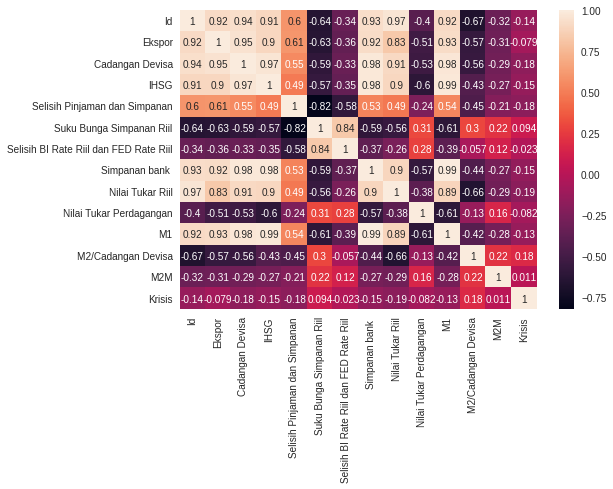

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df = df.drop('Id', axis=1)
df = df.drop('M2/Cadangan Devisa', axis=1)
df = df.drop('Nilai Tukar Perdagangan', axis=1)
df = df.drop('Selisih BI Rate Riil dan FED Rate Riil', axis=1)
df = df.drop('M2M', axis=1)

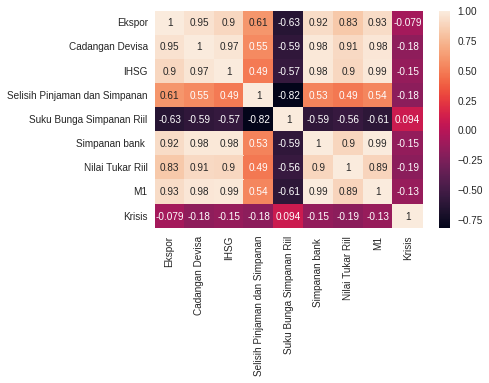

In [ ]:
sns.heatmap(df.corr(), annot=True)

### Data Preperation

#### Train Test Split

In [ ]:
df.head(2)

,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Simpanan bank,Nilai Tukar Riil,M1,Krisis
0,1845.2,6068.2,504.27,1.24,15.56,14.567329,376.63,10.66,1
1,2055.0,6259.1,612.20,1.24,16.63,16.707625,375.39,12.15,1


In [ ]:
col = ['Ekspor','Cadangan Devisa','IHSG','Selisih Pinjaman dan Simpanan','Suku Bunga Simpanan Riil','Simpanan bank ','Nilai Tukar Riil','M1']
X = df[col]
y = df['Krisis']

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                    random_state= 432)

### Regresi Logistic dengan Training dan Test Sets

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
print("R2 " +str(logreg.score(X_test, y_test)))

R2 0.8888888888888888


#### Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        47
           1       1.00      0.14      0.25         7

    accuracy                           0.89        54
   macro avg       0.94      0.57      0.59        54
weighted avg       0.90      0.89      0.85        54



## ===========================Tidak Dipakai =================================

#### Root Mean Square Error

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RSME " +str(rmse))

RSME 0.3333333333333333


### Score Regresi Logistik dengan menggunakan Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(logreg, X, y, cv = 5)
cv_results

array([0.07407407, 0.88888889, 0.59259259, 0.81481481, 0.88888889])

###  Tuning the Linear Regression (Logistic Regression + Cross Validation)

In [ ]:
from sklearn.model_selection import GridSearchCV

c_space = np.logspace(-5, 8, 20)
param_grid = {'C': c_space}

logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

logreg_cv.fit(X,y)

y_pred = logreg_cv.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

##### Nilai R^2

In [ ]:
logreg_cv.score(X_test, y_test) #R^2

0.8518518518518519

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        47
           1       0.33      0.14      0.20         7

    accuracy                           0.85        54
   macro avg       0.61      0.55      0.56        54
weighted avg       0.81      0.85      0.83        54



##### Score AUC

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.5501519756838905

##### Perbandingan Status dalam Train set dan Hasil prediksi

In [ ]:
df_logreg = X_test.merge(y_test,left_index=True, right_index=True)
df_logreg['LogReg_Result'] = y_pred
df_logreg

,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Simpanan bank,Nilai Tukar Riil,M1,Krisis,LogReg_Result
99,6223.86,28094.00,421.33,1.40,12.90,60.259453,4888.74,15.42,0,0
173,11373.35,50580.17,1256.70,1.44,9.72,121.749159,10410.46,41.76,1,0
194,16387.77,113814.19,3819.62,1.77,7.27,230.579485,8635.13,68.19,0,0
50,3431.00,12976.30,453.58,1.19,14.04,60.262658,601.60,21.40,0,0
151,7734.13,35525.13,1216.14,1.33,11.74,98.050271,7760.31,29.29,0,0
188,14192.28,81317.21,3081.88,1.90,6.20,190.669806,9157.28,61.44,0,0
11,2538.00,9623.90,339.96,1.00,22.54,17.233793,436.06,12.10,0,0
92,4471.10,27861.00,636.37,1.56,11.53,67.812256,4118.74,16.49,0,0
145,7222.97,33865.41,1122.37,1.86,6.69,84.416040,7286.38,26.96,0,0
235,12726.00,105345.92,4509.61,1.57,7.67,248.310495,17164.67,73.17,0,0


## 2. Linier Diskriminan

### Linier Diskriminan dengan Training dan Test Set

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lindisc = LinearDiscriminantAnalysis()
lindisc.fit(X_train, y_train)
y_pred = lindisc.predict(X_test)

lindisc.score(X_test, y_test)

0.8888888888888888

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        47
           1       1.00      0.14      0.25         7

    accuracy                           0.89        54
   macro avg       0.94      0.57      0.59        54
weighted avg       0.90      0.89      0.85        54



In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE " + str(rmse))

RMSE 0.3333333333333333


### Score Linier Diskriminan dengan menggunakan Cross Validation

In [ ]:
cv_results = cross_val_score(lindisc, X, y, cv = 5)
cv_results

array([0.03703704, 0.81481481, 0.75925926, 0.31481481, 0.88888889])

### Tuning the Linear Discriminant (Linear Discriminant + Cross Validation)

In [ ]:
# Atur Hyperparameter Grid
param_grid = {'solver': ['lsqr', 'eigen'], 'shrinkage' : np.arange(0,1,0.01)}

# Atur LinearDiscriminantAnalysis() sebagai estimator / classifier
lindisc = LinearDiscriminantAnalysis()

# Definisikan Grid Search
lindisc_cv = GridSearchCV(lindisc, param_grid, cv=5)

#Fit the model to the data
lindisc_cv.fit(X, y)

#Prediksikan Data
y_pred = lindisc_cv.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

##### R^2 :

In [ ]:
lindisc_cv.score(X_test, y_test)

0.8703703703703703

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        47
           1       0.00      0.00      0.00         7

    accuracy                           0.87        54
   macro avg       0.44      0.50      0.47        54
weighted avg       0.76      0.87      0.81        54



In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RSME " + str(rmse))

RSME 0.3600411499115478


##### Perbandingan Status dalam Train set dan Hasil prediksi

In [ ]:
df_lindisc = X_test.merge(y_test,left_index=True, right_index=True)
df_lindisc['lindisc_result'] = y_pred
df_lindisc

,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Simpanan bank,Nilai Tukar Riil,M1,Krisis,lindisc_result
99,6223.86,28094.00,421.33,1.40,12.90,60.259453,4888.74,15.42,0,0
173,11373.35,50580.17,1256.70,1.44,9.72,121.749159,10410.46,41.76,1,0
194,16387.77,113814.19,3819.62,1.77,7.27,230.579485,8635.13,68.19,0,0
50,3431.00,12976.30,453.58,1.19,14.04,60.262658,601.60,21.40,0,0
151,7734.13,35525.13,1216.14,1.33,11.74,98.050271,7760.31,29.29,0,0
188,14192.28,81317.21,3081.88,1.90,6.20,190.669806,9157.28,61.44,0,0
11,2538.00,9623.90,339.96,1.00,22.54,17.233793,436.06,12.10,0,0
92,4471.10,27861.00,636.37,1.56,11.53,67.812256,4118.74,16.49,0,0
145,7222.97,33865.41,1122.37,1.86,6.69,84.416040,7286.38,26.96,0,0
235,12726.00,105345.92,4509.61,1.57,7.67,248.310495,17164.67,73.17,0,0


## kNN

##### Mencari nilai k terbaik

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

list(enumerate(neighbors))

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8)]

In [ ]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

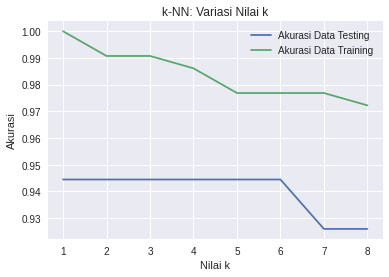

In [ ]:
# plot
plt.title('k-NN: Variasi Nilai k')
plt.plot(neighbors, test_accuracy, label = 'Akurasi Data Testing')
plt.plot(neighbors, train_accuracy, label = 'Akurasi Data Training')
plt.legend()
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.show()

##### Kita pakai k = 1

In [ ]:
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

knn.score(X_test, y_test)

0.9444444444444444

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        47
           1       1.00      0.57      0.73         7

    accuracy                           0.94        54
   macro avg       0.97      0.79      0.85        54
weighted avg       0.95      0.94      0.94        54



In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RSME " + str(rmse))

RSME 0.3600411499115478


###  Score kNN dengan menggunakan Cross Validation

In [ ]:
cv_results = cross_val_score(knn, X, y, cv = 6)
cv_results

array([0.93333333, 0.75555556, 1.        , 0.57777778, 1.        ,
       0.95555556])

### Tuning the kNN (kNN+ Cross Validation)

In [ ]:
params = {'n_neighbors' : np.arange(1, 50)}

knn_cv = GridSearchCV(knn, param_grid = params, cv = 6)

knn_cv.fit(X_train, y_train)

y_pred = knn_cv.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
knn_cv.score(X_test, y_test)

0.9444444444444444

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        47
           1       0.83      0.71      0.77         7

    accuracy                           0.94        54
   macro avg       0.90      0.85      0.87        54
weighted avg       0.94      0.94      0.94        54

